In [2]:
from sklearn import datasets
digits= datasets.load_digits()
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [10]:
print(digits.images[1000])

[[ 0.  0.  1. 14.  2.  0.  0.  0.]
 [ 0.  0.  0. 16.  5.  0.  0.  0.]
 [ 0.  0.  0. 14. 10.  0.  0.  0.]
 [ 0.  0.  0. 11. 16.  1.  0.  0.]
 [ 0.  0.  0.  3. 14.  6.  0.  0.]
 [ 0.  0.  0.  0.  8. 12.  0.  0.]
 [ 0.  0. 10. 14. 13. 16.  8.  3.]
 [ 0.  0.  2. 11. 12. 15. 16. 15.]]


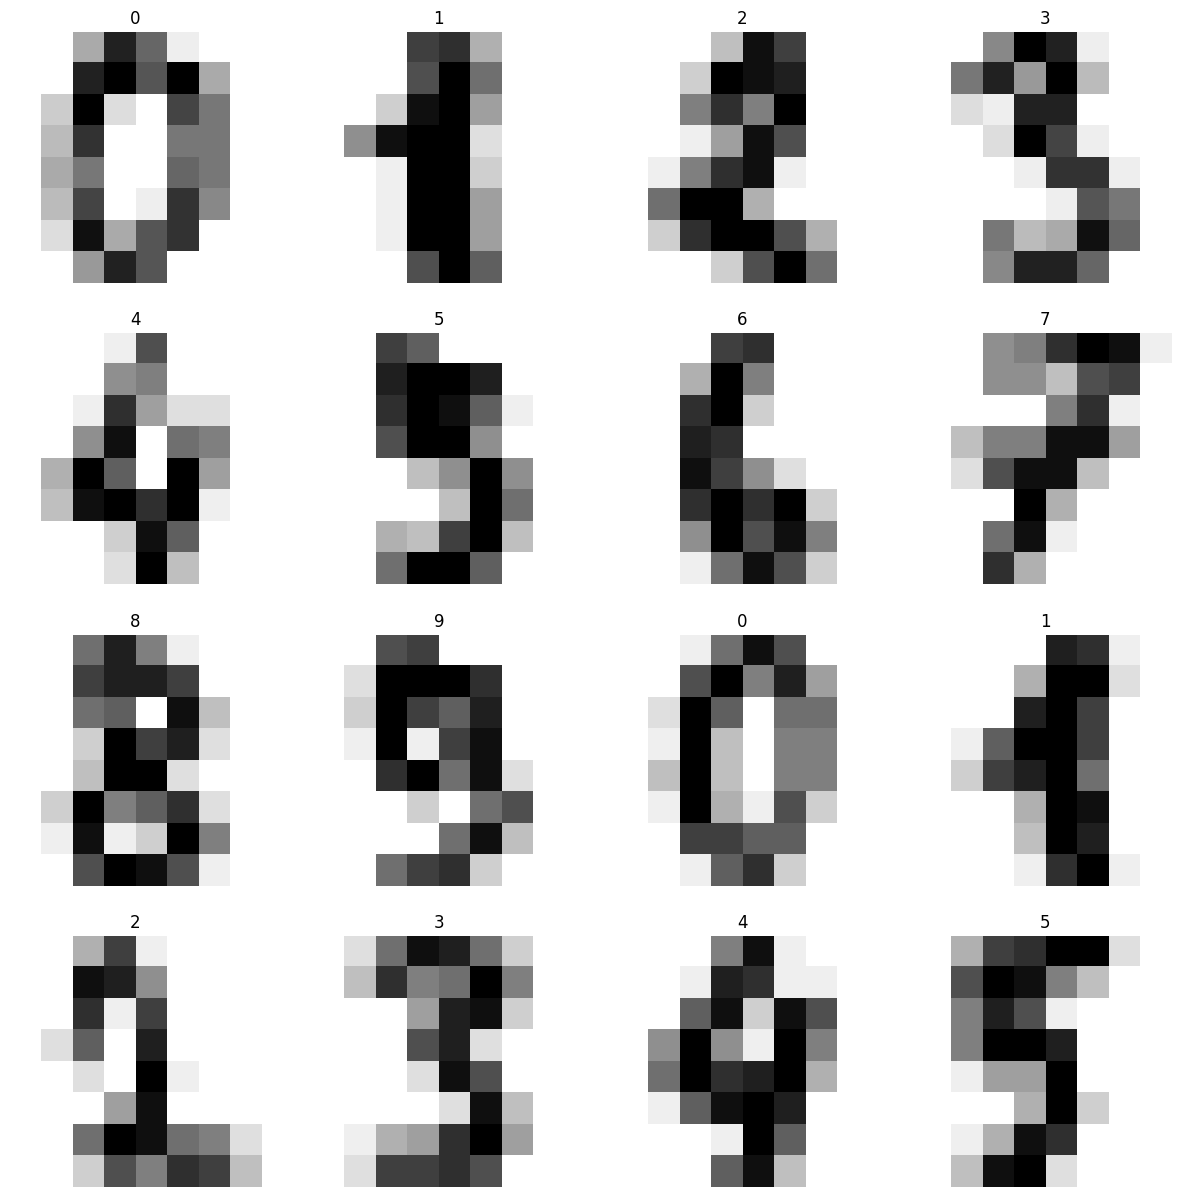

In [12]:
import matplotlib.pyplot as plt

def plot_multi(i):
  nplots=16
  fig= plt.figure(figsize= (15,15))
  for j in range(nplots):
    plt.subplot(4,4,j+1)
    plt.imshow(digits.images[i+j], cmap='binary')
    plt.title(digits.target[i+j])
    plt.axis('off')
  plt.show()

plot_multi(0)


In [13]:
y= digits.target
x= digits.images.reshape((len(digits.images),-1))
x.shape

(1797, 64)

In [14]:
x[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [23]:
x_train= x[:1000]
y_train= y[:1000]

x_test= x[1000:]
y_test=y[1000:]

In [80]:
from sklearn.neural_network import MLPClassifier

mlp= MLPClassifier(hidden_layer_sizes=(150,),
                   activation='logistic'  ,
                   alpha= 1e-4,random_state=1,
                   learning_rate_init= .01,
                   verbose= True)

In [81]:
mlp.fit(x_train,y_train)

Iteration 1, loss = 1.86053058
Iteration 2, loss = 0.84195665
Iteration 3, loss = 0.44233059
Iteration 4, loss = 0.25270531
Iteration 5, loss = 0.15853424
Iteration 6, loss = 0.10973227
Iteration 7, loss = 0.08364498
Iteration 8, loss = 0.06129848
Iteration 9, loss = 0.04973436
Iteration 10, loss = 0.03985388
Iteration 11, loss = 0.03110382
Iteration 12, loss = 0.02759515
Iteration 13, loss = 0.02333111
Iteration 14, loss = 0.01986509
Iteration 15, loss = 0.01740235
Iteration 16, loss = 0.01534045
Iteration 17, loss = 0.01372280
Iteration 18, loss = 0.01263139
Iteration 19, loss = 0.01153191
Iteration 20, loss = 0.01067786
Iteration 21, loss = 0.00990223
Iteration 22, loss = 0.00910878
Iteration 23, loss = 0.00851078
Iteration 24, loss = 0.00797574
Iteration 25, loss = 0.00755875
Iteration 26, loss = 0.00710218
Iteration 27, loss = 0.00665470
Iteration 28, loss = 0.00634382
Iteration 29, loss = 0.00594689
Iteration 30, loss = 0.00560469
Iteration 31, loss = 0.00539323
Iteration 32, los

MLPClassifier(activation='logistic', hidden_layer_sizes=(150,),
              learning_rate_init=0.01, random_state=1, verbose=True)

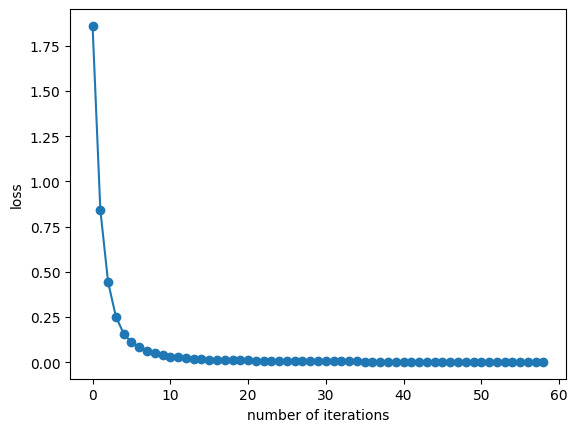

In [82]:
fig, axes= plt.subplots(1,1)
axes.plot(mlp.loss_curve_, 'o-')
axes.set_xlabel("number of iterations")
axes.set_ylabel("loss")
plt.show()

In [83]:
predictions= mlp.predict(x_test)
predictions[:50]

array([1, 4, 0, 5, 3, 6, 9, 6, 1, 7, 5, 4, 4, 7, 2, 8, 2, 2, 5, 7, 9, 5,
       4, 4, 9, 0, 8, 9, 8, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4,
       5, 6, 7, 8, 9, 0])

In [84]:
y_test[:50]

array([1, 4, 0, 5, 3, 6, 9, 6, 1, 7, 5, 4, 4, 7, 2, 8, 2, 2, 5, 7, 9, 5,
       4, 4, 9, 0, 8, 9, 8, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4,
       5, 6, 7, 8, 9, 0])

In [85]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test,predictions)

0.944792973651192